In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import data

In [36]:
hour_data = pd.read_csv('intraday.csv')
day_ahead_data = pd.read_csv('day_ahead.csv')

data cleaning

In [37]:
hour_data = hour_data.iloc[::-1].reset_index(drop=True)
hour_data = hour_data[hour_data["DataProvider"] == "APXMIDP"]
hour_data = hour_data.reset_index(drop=True)
hour_data = hour_data.drop(columns='DataProvider')

In [38]:
hour_data.head()

,StartTime,SettlementDate,SettlementPeriod,Price,Volume
0,2024-09-01T00:00:00Z,01-09-2024,3,72.59,1685.05
1,2024-09-01T00:30:00Z,01-09-2024,4,70.94,1669.60
2,2024-09-01T01:00:00Z,01-09-2024,5,70.27,1496.75
3,2024-09-01T01:30:00Z,01-09-2024,6,70.32,1401.25
4,2024-09-01T02:00:00Z,01-09-2024,7,74.60,1601.90


In [39]:
day_ahead_data.head()

,Delivery period ( EET ),01-09-2024,02-09-2024,03-09-2024,04-09-2024,05-09-2024,06-09-2024,07-09-2024,08-09-2024
0,00:00 - 01:00,86.12,87.07,91.19,87.53,71.12,79.65,81.54,79.03
1,01:00 - 02:00,73.12,79.25,83.72,90.01,86.26,63.74,94.14,98.93
2,02:00 - 03:00,65.48,80.86,77.04,85.14,81.72,57.75,85.02,87.55
3,03:00 - 04:00,59.38,79.13,77.03,81.04,77.44,54.25,80.88,82.91
4,04:00 - 05:00,50.61,76.82,78.13,78.60,73.67,53.66,74.04,78.36


In [40]:
X = range(384)
Z = pd.concat(
    [
        day_ahead_data["01-09-2024"],
        day_ahead_data["02-09-2024"],
        day_ahead_data["03-09-2024"],
        day_ahead_data["04-09-2024"],
        day_ahead_data["05-09-2024"],
        day_ahead_data["06-09-2024"],
        day_ahead_data["07-09-2024"],
        day_ahead_data["08-09-2024"],
    ]
)
Z = list(Z)
Y = [Z[i // 2] for i in range(0, 384)]

Plotting both intraday and day ahead prices

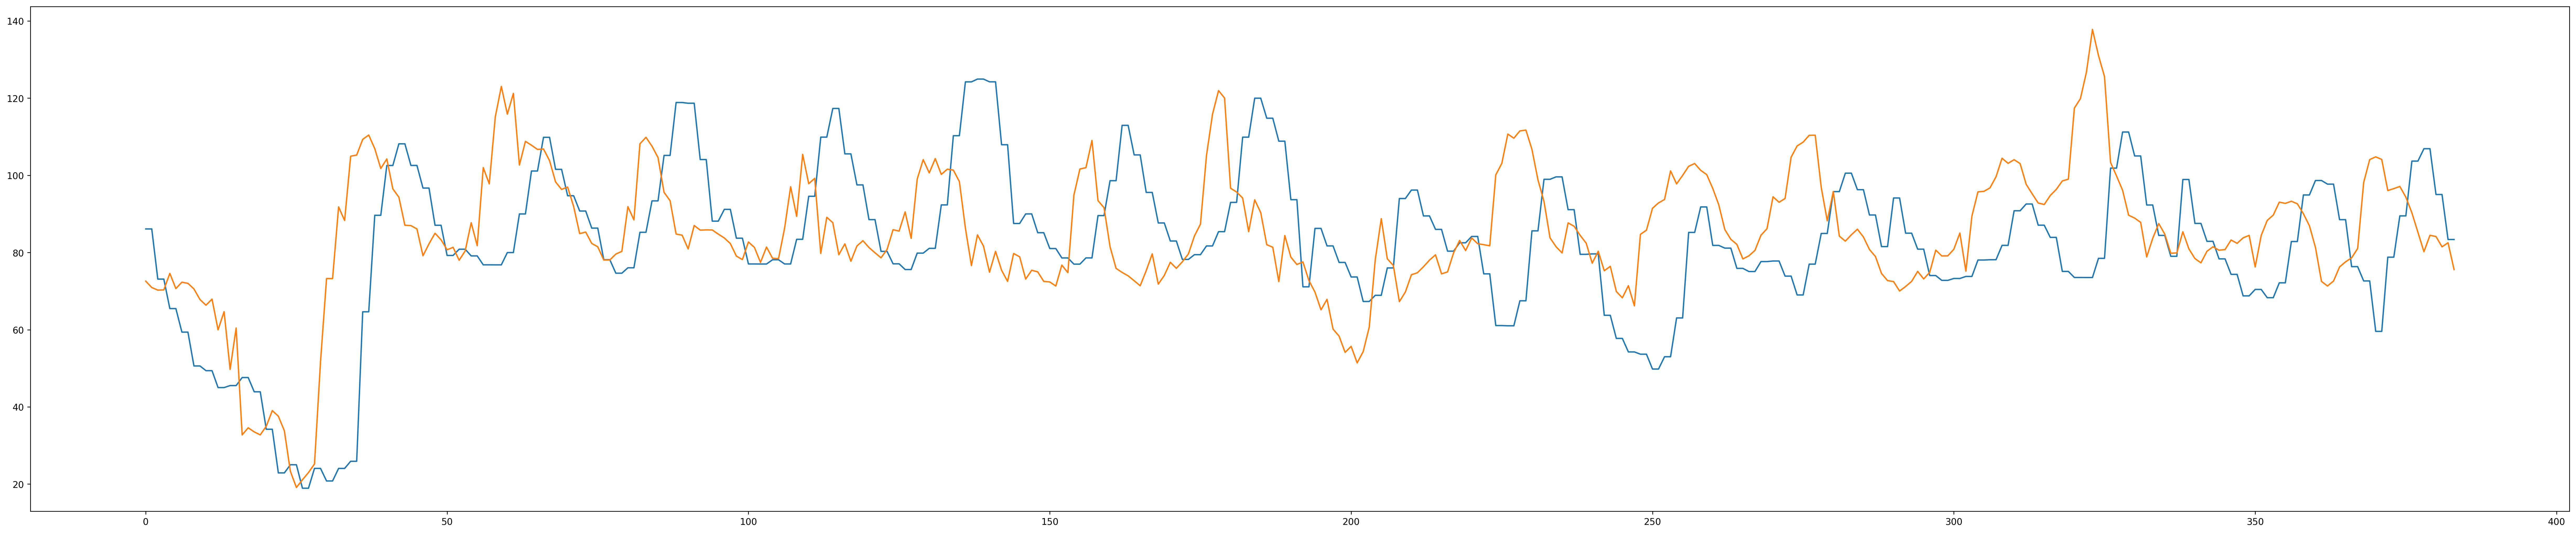

In [41]:
plt.figure(dpi=250,figsize=(50,10))
plt.plot(X,Y)
plt.plot(X,hour_data['Price'])
# plt.show()
plt.savefig('together.jpg')

In [42]:
len(hour_data)

384

In [43]:
type(hour_data['StartTime'][0])

str

In [44]:
XTime = pd.to_datetime(hour_data["StartTime"])

In [45]:
len(XTime)

384

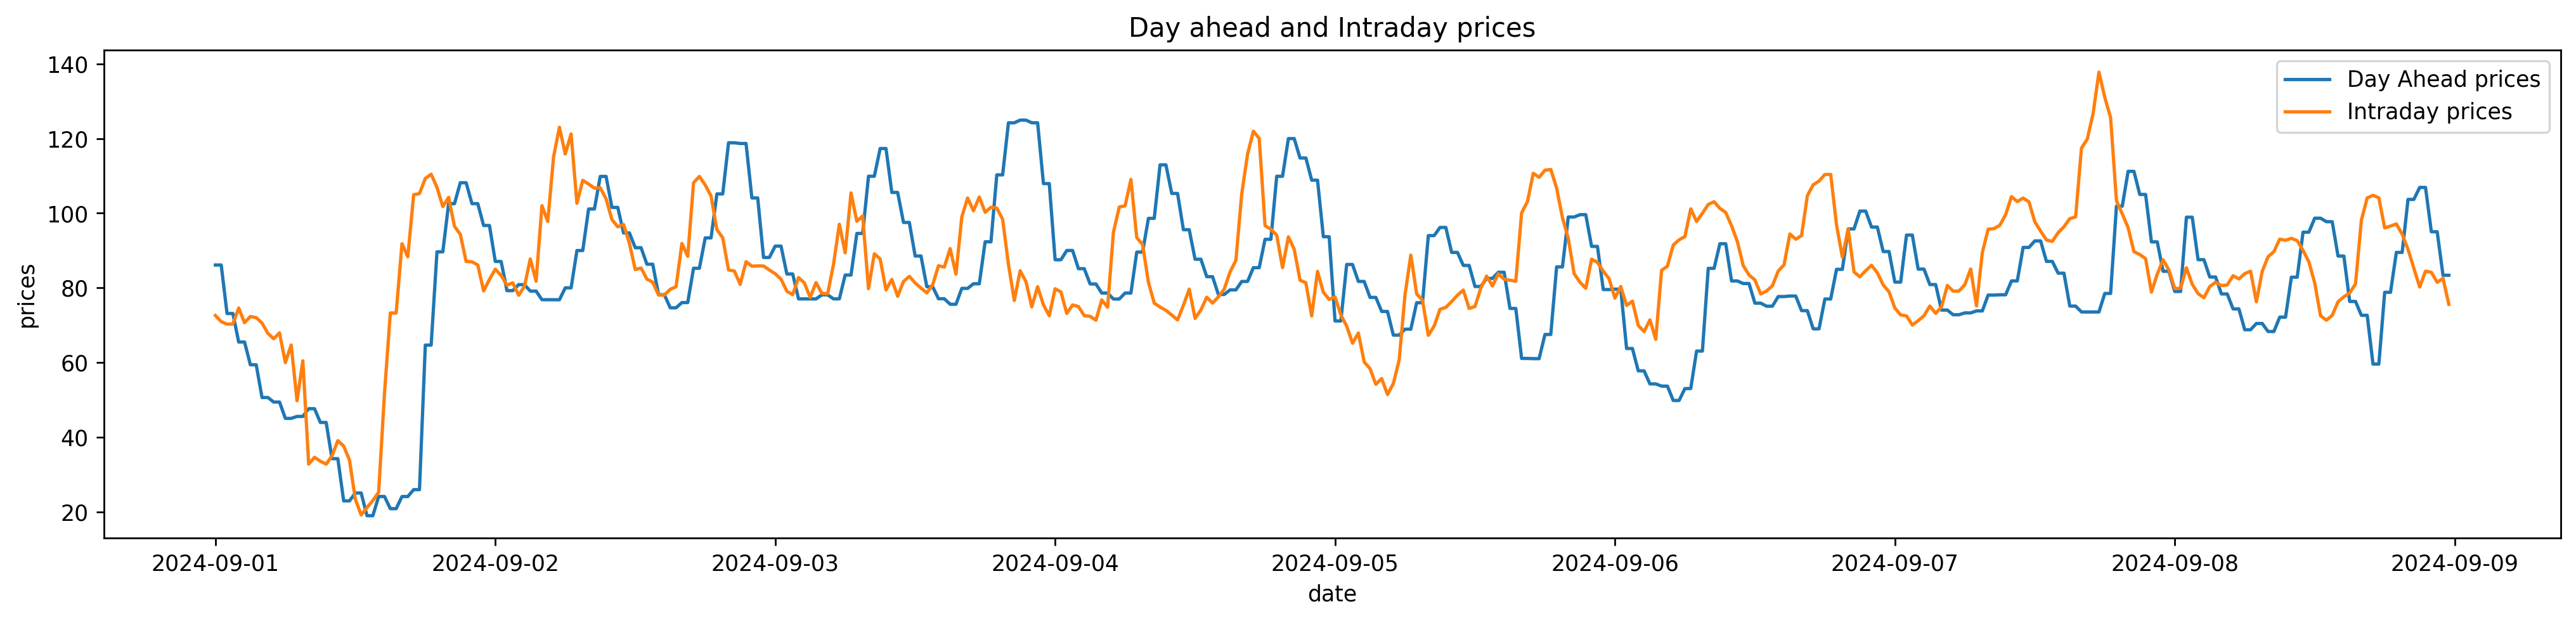

In [46]:
plt.figure(dpi=250,figsize=(20,4))
plt.plot(XTime,Y,label='Day Ahead prices')
plt.plot(XTime,hour_data['Price'],label='Intraday prices')
plt.legend()
plt.title('Day ahead and Intraday prices')
plt.xlabel('date')
plt.ylabel('prices')
# plt.show()
plt.savefig('together.jpg')

more data cleaning, trying to make intraday similar to day ahead

In [47]:
half_hour_time_ranges = ['00:00 - 00:30', '00:30 - 01:00', '01:00 - 01:30', '01:30 - 02:00', '02:00 - 02:30', '02:30 - 03:00', '03:00 - 03:30', '03:30 - 04:00', '04:00 - 04:30', '04:30 - 05:00', '05:00 - 05:30', '05:30 - 06:00', '06:00 - 06:30', '06:30 - 07:00', '07:00 - 07:30', '07:30 - 08:00', '08:00 - 08:30', '08:30 - 09:00', '09:00 - 09:30', '09:30 - 10:00', '10:00 - 10:30', '10:30 - 11:00', '11:00 - 11:30', '11:30 - 12:00', '12:00 - 12:30', '12:30 - 13:00', '13:00 - 13:30', '13:30 - 14:00', '14:00 - 14:30', '14:30 - 15:00', '15:00 - 15:30', '15:30 - 16:00', '16:00 - 16:30', '16:30 - 17:00', '17:00 - 17:30', '17:30 - 18:00', '18:00 - 18:30', '18:30 - 19:00', '19:00 - 19:30', '19:30 - 20:00', '20:00 - 20:30', '20:30 - 21:00', '21:00 - 21:30', '21:30 - 22:00', '22:00 - 22:30', '22:30 - 23:00', '23:00 - 23:30', '23:30 - 00:00']

In [48]:
intraday = pd.DataFrame(half_hour_time_ranges, columns=["Time Interval"])

In [49]:
intraday.head()

,Time Interval
0,00:00 - 00:30
1,00:30 - 01:00
2,01:00 - 01:30
3,01:30 - 02:00
4,02:00 - 02:30


In [50]:
intraday["01-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-01"]['Price'])
intraday["02-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-02"]['Price'])
intraday["03-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-03"]['Price'])
intraday["04-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-04"]['Price'])
intraday["05-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-05"]['Price'])
intraday["06-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-06"]['Price'])
intraday["07-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-07"]['Price'])
intraday["08-09-2024"] = list(hour_data[hour_data["StartTime"].str[:10] == "2024-09-08"]['Price'])

In [51]:
intraday

,Time Interval,01-09-2024,02-09-2024,03-09-2024,04-09-2024,05-09-2024,06-09-2024,07-09-2024,08-09-2024
0,00:00 - 00:30,72.59,85.00,83.78,79.75,77.58,77.25,74.58,79.82
1,00:30 - 01:00,70.94,83.31,82.32,78.90,72.73,80.34,72.74,79.90
2,01:00 - 01:30,70.27,80.72,79.08,73.13,69.75,75.28,72.47,85.38
3,01:30 - 02:00,70.32,81.35,78.18,75.41,65.15,76.43,70.03,80.95
4,02:00 - 02:30,74.60,78.01,82.74,74.99,67.89,69.91,71.20,78.45
5,02:30 - 03:00,70.66,80.41,81.32,72.53,60.16,68.27,72.53,77.34
6,03:00 - 03:30,72.32,87.73,77.45,72.38,58.35,71.41,75.12,80.33
7,03:30 - 04:00,72.02,81.78,81.42,71.33,54.13,66.19,73.16,81.50
8,04:00 - 04:30,70.57,102.01,78.52,76.75,55.69,84.71,74.89,80.61
9,04:30 - 05:00,67.82,97.80,78.43,74.79,51.41,85.80,80.63,80.77


removing non numerical values and calculating variance

intraday

In [52]:
df_numeric = intraday.drop(columns=["Time Interval"])
df_numeric.var()

01-09-2024    727.817376
02-09-2024    159.530451
03-09-2024     85.046520
04-09-2024    178.723180
05-09-2024    238.040593
06-09-2024    129.264919
07-09-2024    275.099912
08-09-2024     69.771762
dtype: float64

Day with the most variance: 01-09-2024, Variance: 727.8173758865249
Day with the least variance: 08-09-2024, Variance: 69.77176152482271

day ahead

In [53]:
df_numeric2 = day_ahead_data.drop(columns='Delivery period ( EET )')
df_numeric2.var()

01-09-2024    861.708678
02-09-2024    180.188716
03-09-2024    293.142811
04-09-2024    172.204648
05-09-2024    124.861060
06-09-2024    216.280900
07-09-2024    115.915582
08-09-2024    156.906556
dtype: float64

Day with the most variance: 01-09-2024, Variance: 861.708678
Day with the least variance: 07-09-2024, Variance: 115.915582

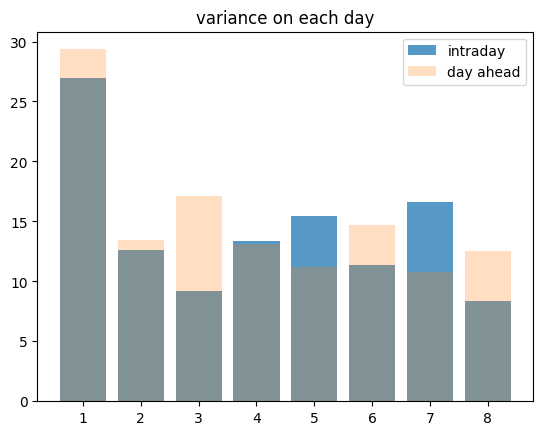

In [77]:
plt.bar(range(1,9),df_numeric.std(),label='intraday',alpha=0.75)
plt.bar(range(1,9),df_numeric2.std(),label='day ahead',alpha=0.25)
plt.legend()
plt.title('variance on each day')
plt.show()

In [54]:
df_shift = df_numeric - df_numeric.shift(1)
volatility_threshold = df_shift.std()
volatility_threshold

01-09-2024    8.681923
02-09-2024    7.037948
03-09-2024    6.678966
04-09-2024    7.548491
05-09-2024    5.965590
06-09-2024    5.451649
07-09-2024    6.237237
08-09-2024    4.505331
dtype: float64

The days with highest volatality:
01-09-2024    8.681923
04-09-2024    7.548491
02-09-2024    7.037948

The days with lowest volatality:
05-09-2024    5.965590
06-09-2024    5.451649
08-09-2024    4.505331

In [55]:
len(intraday['01-09-2024'])

48

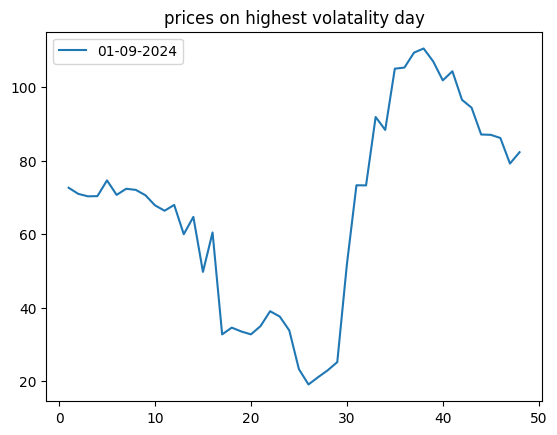

In [56]:
plt.plot(range(1, 49), intraday["01-09-2024"], label="01-09-2024")
plt.legend()
plt.title('prices on highest volatality day')
plt.show()

In [57]:
df_shift2 = df_numeric2 - df_numeric2.shift(1)
volatility_threshold2 = df_shift2.std()
volatility_threshold2

01-09-2024    11.831738
02-09-2024     8.419815
03-09-2024     9.144742
04-09-2024     8.207275
05-09-2024     9.110261
06-09-2024     8.149157
07-09-2024     8.158146
08-09-2024    10.229251
dtype: float64

The days with highest volatality:
01-09-2024    11.831738
03-09-2024     9.144742
08-09-2024    10.229251

The days with the lowest volatality:
04-09-2024     8.207275
06-09-2024     8.149157
07-09-2024     8.158146

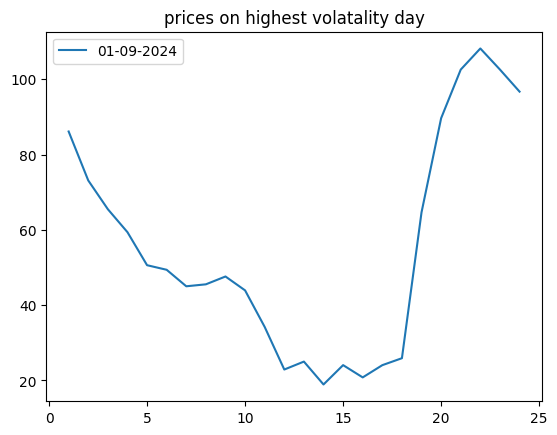

In [58]:
plt.plot(range(1, 25), day_ahead_data["01-09-2024"], label="01-09-2024")
plt.legend()
plt.title("prices on highest volatality day")
plt.show()

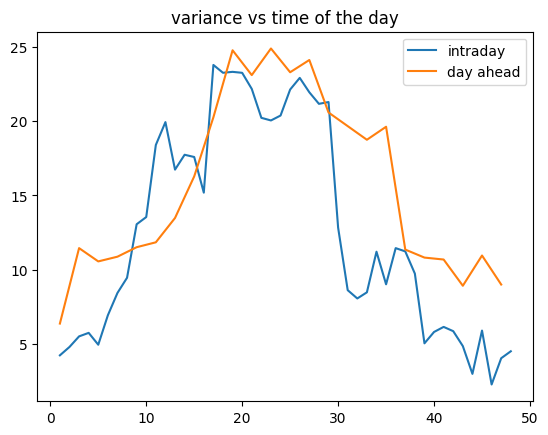

In [78]:
plt.plot(range(1,49),df_numeric.std(axis=1),label='intraday')
plt.plot(range(1,49,2),df_numeric2.std(axis=1),label='day ahead')
plt.legend()
plt.title('variance vs time of the day')
plt.show()

we can see significant peak at peek time

importing National demand data 

In [60]:
demand = pd.read_csv('demanddata.csv')

In [61]:
# only 1st week of september is needed
demand = demand[demand['SETTLEMENT_DATE'].isin([
    '2024-09-01',
    '2024-09-02',
    '2024-09-03',
    '2024-09-04',
    '2024-09-05',
    '2024-09-06',
    '2024-09-07',
    '2024-09-08',
])]

In [62]:
demand.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'SCOTTISH_TRANSFER', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW',
       'MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW', 'NSL_FLOW',
       'ELECLINK_FLOW', 'VIKING_FLOW'],
      dtype='object')

normalising both price and demand to 0-1 so we can compare both

In [63]:
max1 = hour_data['Price'].max()
Y1 = hour_data['Price']/max1

In [64]:
max2 = demand['ND'].max()
Y2 = demand['ND']/max2

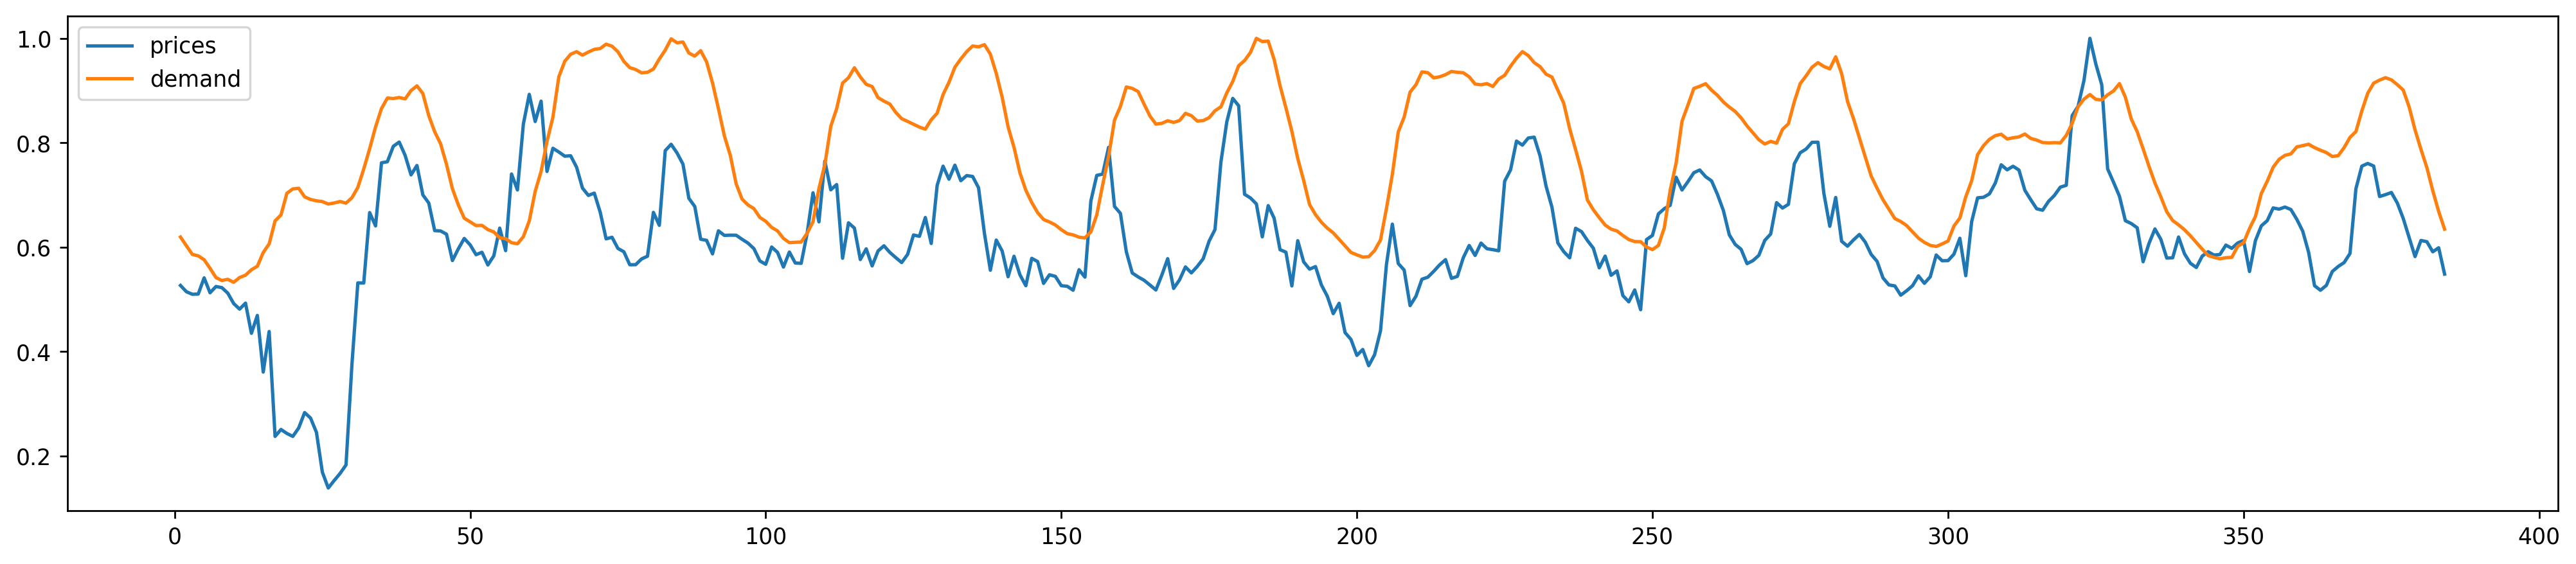

In [65]:
plt.figure(dpi=250,figsize=(20,4))
plt.plot(range(1,385),Y1,label='prices')
plt.plot(range(1,385),Y2,label="demand")
plt.legend()
plt.show()

Trading Strategy:

Mean reversion: Identify periods of overbought or oversold conditions based on historical price data.

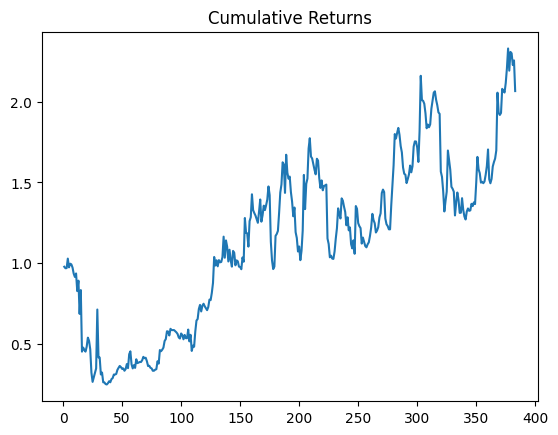

In [80]:
# calculating returns
hour_data["returns"] = hour_data["Price"].pct_change()

# Calculate the rolling mean
hour_data["rolling_mean"] = hour_data["Price"].rolling(window=20).mean()

# Generate signals
hour_data["signal"] = np.where(hour_data["Price"] > hour_data["rolling_mean"], -1, 1)

# Calculate returns based on the signals
hour_data["strategy_returns"] = hour_data["returns"] * hour_data["signal"].shift(1)

# Calculate cumulative returns
cumulative_returns = (1 + hour_data["strategy_returns"]).cumprod()

plt.plot(cumulative_returns)
plt.title("Cumulative Returns")
plt.show()